In [7]:
from random import sample
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [15]:
# Toy two class linear classifier
## Set up two even sized samples
samples_per_class = 600
class_1_samples = np.random.multivariate_normal(
    mean=[0,2],
    cov=[[1,0.5], [0.5, 1]],
    size = samples_per_class)
class_2_samples = np.random.multivariate_normal(
    mean=[2,0],
    cov=[[1,0.5], [0.5, 1]],
    size = samples_per_class)

## Combine into one vector
class_samples = np.vstack((class_1_samples, class_2_samples)).astype(np.float32)

## Generate a vector of target labels
targets = np.vstack((np.zeros((samples_per_class, 1), dtype="float32"),
                     np.ones((samples_per_class, 1), dtype="float32")))

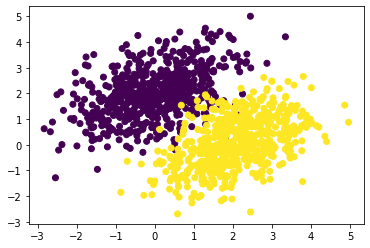

In [13]:
# Plot the input sets
plt.scatter(class_samples[:,0], class_samples[:,1], c=targets[:,0])

In [22]:
print(class_samples)

[[ 0.11794826  1.6472515 ]
 [ 0.32768682  3.483578  ]
 [ 0.58515847  1.1919236 ]
 ...
 [ 1.1974217  -0.6139161 ]
 [ 1.3363057   0.01638982]
 [ 2.7971287   1.381768  ]]


In [21]:
## Define weights and a transforming constant
input_dim = 2
output_dim = 1
W = tf.Variable(initial_value=tf.random.uniform(shape=(input_dim, output_dim)))
b = tf.Variable(initial_value=tf.zeros(shape = (output_dim)))

# Define forward pass function:
def model(inputs):
    return tf.matmul(inputs, W) + b

# Define loss function
def square_loss(predictions, targets):
    per_sample_losses = tf.square(targets - predictions)
    # Turn this per_sample vector into a scalar
    return tf.reduce_mean(per_sample_losses)

# Define training step function
learning_rate = 0.1

def training_step(inputs, targets):
    with tf.GradientTape() as tape:
        # Model our inputs to come up with a set of predictions
        predictions = model(inputs)
        # Calculate the loss value between our predctions and targets
        loss = square_loss(predictions, targets)
    # Retrieve the partial derivatives of loss wrt W and b
    grad_loss_wrt_W, grad_loss_wrt_b = tape.gradient(loss, [W, b])
    # Move W and B down the gradients by learning_rate amount
    W.assign_sub(grad_loss_wrt_W * learning_rate)
    b.assign_sub(grad_loss_wrt_b * learning_rate)
    return loss

for step in range(100):
    loss = training_step(class_samples, targets)
    print(f"Loss at step {step}: {loss:.4f}")

Loss at step 0: 3.1970
Loss at step 1: 0.6015
Loss at step 2: 0.3173
Loss at step 3: 0.2358
Loss at step 4: 0.1980
Loss at step 5: 0.1737
Loss at step 6: 0.1550
Loss at step 7: 0.1394
Loss at step 8: 0.1263
Loss at step 9: 0.1150
Loss at step 10: 0.1054
Loss at step 11: 0.0972
Loss at step 12: 0.0902
Loss at step 13: 0.0842
Loss at step 14: 0.0790
Loss at step 15: 0.0746
Loss at step 16: 0.0708
Loss at step 17: 0.0676
Loss at step 18: 0.0648
Loss at step 19: 0.0624
Loss at step 20: 0.0604
Loss at step 21: 0.0586
Loss at step 22: 0.0571
Loss at step 23: 0.0559
Loss at step 24: 0.0548
Loss at step 25: 0.0538
Loss at step 26: 0.0530
Loss at step 27: 0.0524
Loss at step 28: 0.0518
Loss at step 29: 0.0513
Loss at step 30: 0.0508
Loss at step 31: 0.0505
Loss at step 32: 0.0502
Loss at step 33: 0.0499
Loss at step 34: 0.0497
Loss at step 35: 0.0495
Loss at step 36: 0.0493
Loss at step 37: 0.0491
Loss at step 38: 0.0490
Loss at step 39: 0.0489
Loss at step 40: 0.0488
Loss at step 41: 0.0487
Lo

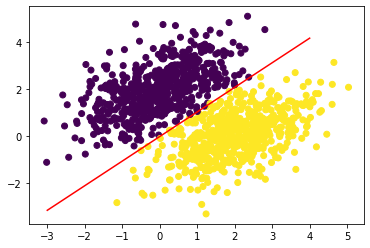

In [25]:
# Graph the predictions of the model trained above
predictions = model(class_samples)
x = np.linspace(-3,4,1000)
y = -W[0] / W[1] * x + (0.5 -b) / W[1]
plt.plot(x,y,'-r')
plt.scatter(class_samples[:,0], class_samples[:, 1], c=predictions[:,0] > 0.5)
plt.show()

In [ ]:
# Show the same line above the actual input data
plt.plot(x,y,'-b')
plt.scatter(class_samples[:,0], class_samples[:,1], c=targets[:,0])